# GNN Explainer

The purpose of this notebook is to present GNN Explainer, a general, model-agnostic approach for providing inter-
pretable explanations for predictions of any GNN-based model on any graph-based
machine learning task.

The notebook is organized as follows:

* Brief theoretical recap on GNN-EXPLAINER
* Train your GNN-EXPLAINER to explain graph classification predictions
* Visualize and understand the proposed explanation

## Model Description
TODO

## Graph Explainer on REDDIT-BINARY

In [262]:
from src.explain import GNNExplainer
from src.models import GraphLevelGNN
from torch_geometric.data import DataLoader
from torch_geometric.datasets import TUDataset
import torch_geometric.transforms as T

In [266]:
# Load pretrained model
model = GraphLevelGNN.load_from_checkpoint('/io/ckpt/pretrained_model.ckpt')

In [267]:
dataset = TUDataset(root='/io/reddit', name='REDDIT-BINARY', transform=T.Constant(1))
loader = DataLoader(dataset, batch_size=1, shuffle=True)
data = next(iter(loader))

x = data.x
edge_index = data.edge_index
print(f'Number of nodes: {x.shape[0]}\nNumber of edges: {edge_index.shape[1]}')

Number of nodes: 881
Number of edges: 2070


In [268]:
# Initialize explainer
explainer = GNNExplainer(model, epochs=200)
# Train explainer
feat_mask, edge_mask = explainer.explain_graph(x, edge_index, data.batch)

Edge Threshold: 0.917
Removed 2047 edges -- K = 23 remain.
Removed 856 nodes -- K = 25 remain.


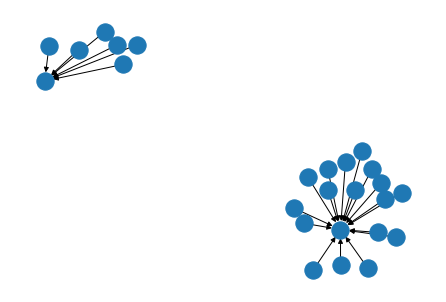

In [273]:
# Visualize explanation subgraph
G_original, G_subgraph = explainer.visualize_subgraph(edge_index, edge_mask, y=data.y, threshold=0.917)